In [1]:
from utility import *
seed = 22

# GPUs Available:  1


In [2]:
#load the data
data_size = 1000
X_train, Y_train, X_validation, Y_validation, X_test = load_data(data_size)

# defining the parameters

batch_size = 32
epochs = 1000
# steps_per_epoch = sum(train_occurences) / batch_size
starter_learning_rate = 1e-1
end_learning_rate = 1e-8
decay_steps = epochs * 3
# loss = tf.keras.losses.MeanAbsoluteError
# loss = tf.keras.losses.MeanSquaredError
# metrics = tf.keras.metrics.MeanSquaredError()
scheduler = tf.keras.optimizers.schedules.PolynomialDecay(initial_learning_rate= starter_learning_rate,
                                                            decay_steps= decay_steps,
                                                            end_learning_rate= end_learning_rate,
                                                            power=1
                                                            )
# scheduler = 0.01
# optimizer=tf.keras.optimizers.Adam(learning_rate=scheduler)
kernel_regularizer=tf.keras.regularizers.L1(0.01)
callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error',patience=20)]
# initializer=tf.keras.initializers.HeUniform(seed = seed)

verbose=2

# generating augmented data
X_train_Aug, Y_train_Aug = data_augmentation(X_train, Y_train)

1000 rowed data loaded


In [3]:
class Hidden_layer(layers.Layer):
    def __init__(self,units, **kwargs):
        super(Hidden_layer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.W = self.add_weight(name = 'w',shape=(input_shape[-1],self.units), 
                                initializer=tf.keras.initializers.HeUniform(seed = seed),
                                trainable=True, regularizer=tf.keras.regularizers.L1L2(0.01))

    def call(self, inputs):
        x = tf.keras.activations.relu(tf.matmul(inputs, self.W))
        return x
    def get_config(self):
        config = super(Hidden_layer, self).get_config()
        config.update({"units": self.units})
        # config.update({"initializer": initializer})
        # config.update({"kernel_regularizer": kernel_regularizer})
        return config
        # return {"units": self.units, "kernel_regularizer": kernel_regularizer, "initializer": initializer}
    # @classmethod
    # def from_config(cls, config):
    #     return cls(**config)
        
class Output_layer(layers.Layer):
    def __init__(self, units, **kwargs):
        super(Output_layer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.W = self.add_weight(name = 'w',shape=(input_shape[-1],self.units), 
                                initializer=tf.keras.initializers.HeUniform(seed = seed),
                                trainable=True, regularizer=tf.keras.regularizers.L1L2(0.01))

    def call(self, inputs):
        x = tf.matmul(inputs, self.W)
        return tf.keras.activations.tanh(x)
    def get_config(self):
        config = super(Output_layer, self).get_config()
        config.update({"units": self.units})
        # config.update({"initializer": initializer})
        # config.update({"kernel_regularizer": kernel_regularizer})
        return config
        # return {"units": self.units, "kernel_regularizer": kernel_regularizer, "initializer": initializer}
    # @classmethod
    # def from_config(cls, config):
    #     return cls(**config)

# class MyReLU(layers.Layer):
#     def __init__(self):
#         super(MyReLU, self).__init__()

#     def call(self, x):
#         return tf.math.maximum(x, 0)

In [4]:
# NN Model 
class NNmodel():
    def model():
        model = tf.keras.models.Sequential()
        model.add(Hidden_layer(4))
        model.add(Output_layer(2))
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=scheduler),
                    loss = [tf.keras.losses.MeanAbsoluteError()],
                    metrics = tf.keras.metrics.MeanSquaredError()
        )
        return model

Epoch 1/1000
32/32 - 1s - loss: 0.5234 - mean_squared_error: 0.2865 - val_loss: 0.4205 - val_mean_squared_error: 0.1327 - 1s/epoch - 35ms/step
Epoch 2/1000
32/32 - 0s - loss: 0.3189 - mean_squared_error: 0.0366 - val_loss: 0.2977 - val_mean_squared_error: 0.0251 - 103ms/epoch - 3ms/step
Epoch 3/1000
32/32 - 0s - loss: 0.2825 - mean_squared_error: 0.0217 - val_loss: 0.3051 - val_mean_squared_error: 0.0269 - 107ms/epoch - 3ms/step
Epoch 4/1000
32/32 - 0s - loss: 0.2867 - mean_squared_error: 0.0232 - val_loss: 0.2933 - val_mean_squared_error: 0.0247 - 128ms/epoch - 4ms/step
Epoch 5/1000
32/32 - 0s - loss: 0.2734 - mean_squared_error: 0.0199 - val_loss: 0.2826 - val_mean_squared_error: 0.0205 - 130ms/epoch - 4ms/step
Epoch 6/1000
32/32 - 0s - loss: 0.2761 - mean_squared_error: 0.0207 - val_loss: 0.2882 - val_mean_squared_error: 0.0241 - 103ms/epoch - 3ms/step
Epoch 7/1000
32/32 - 0s - loss: 0.2711 - mean_squared_error: 0.0196 - val_loss: 0.3199 - val_mean_squared_error: 0.0378 - 149ms/epoc

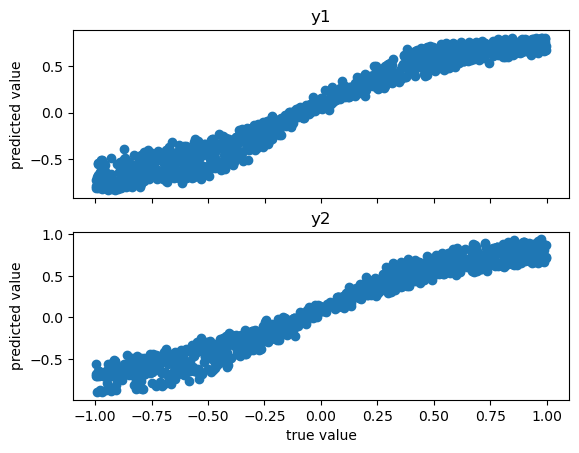

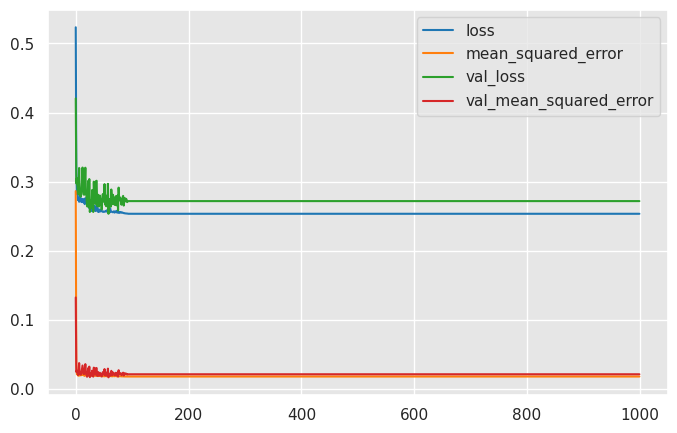

1/1 [==============================] - 0s 16ms/step
[[ 0.09875293  0.09974722]
 [-0.29600107  0.47320623]
 [-0.29378036 -0.30667186]
 [ 0.46469484 -0.30410215]
 [ 0.46278569  0.47540268]
 [-0.46778751  0.61768326]
 [ 0.60777536 -0.47854115]
 [-0.5285102   0.66630774]
 [ 0.60777536 -0.47854115]
 [-0.46493268 -0.481812  ]]


In [5]:
# Model 1 - NN fitting with Normal data
model = NNmodel.model()
history = model.fit(X_train, Y_train, 
                    epochs=epochs, 
                    batch_size= batch_size, 
                    verbose=verbose, 
                    validation_data=(X_validation, Y_validation),
                    # callbacks=callbacks,
                    # shuffle=True
                    )  
model_eval(model, history, X_validation, Y_validation, X_train, Y_train, batch_size, X_test)

if data_size==100:
    model.save('./models/NN_100_normal.h5')
else:
    model.save('./models/NN_1000_normal.h5')

32/32 [==============================] - 0s 2ms/step
rmse of y1:  0.14842606141951495
rmse of y2:  0.14590200821827037
1/1 [==============================] - 0s 16ms/step
[[ 0.09875293  0.09974722]
 [-0.29600107  0.47320623]
 [-0.29378036 -0.30667186]
 [ 0.46469484 -0.30410215]
 [ 0.46278569  0.47540268]
 [-0.46778751  0.61768326]
 [ 0.60777536 -0.47854115]
 [-0.5285102   0.66630774]
 [ 0.60777536 -0.47854115]
 [-0.46493268 -0.481812  ]]


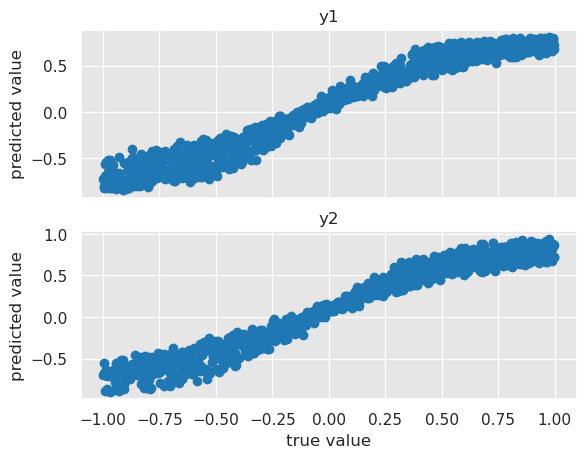

In [6]:
from keras.utils import CustomObjectScope

with CustomObjectScope({'Hidden_layer':Hidden_layer, 'Output_layer':Output_layer}):
       if data_size==100:
              load_model = tf.keras.models.load_model('./models/NN_100_normal.h5')
       else:
              load_model = tf.keras.models.load_model('./models/NN_1000_normal.h5')
       
model_eval_low(load_model, X_validation, Y_validation, X_train, Y_train, batch_size, X_test)

Epoch 1/1000
250/250 - 1s - loss: 0.3287 - mean_squared_error: 0.0706 - val_loss: 0.2665 - val_mean_squared_error: 0.0222 - 685ms/epoch - 3ms/step
Epoch 2/1000
250/250 - 0s - loss: 0.2847 - mean_squared_error: 0.0290 - val_loss: 0.2567 - val_mean_squared_error: 0.0185 - 389ms/epoch - 2ms/step
Epoch 3/1000
250/250 - 0s - loss: 0.2856 - mean_squared_error: 0.0293 - val_loss: 0.2618 - val_mean_squared_error: 0.0203 - 418ms/epoch - 2ms/step
Epoch 4/1000
250/250 - 0s - loss: 0.2837 - mean_squared_error: 0.0288 - val_loss: 0.2543 - val_mean_squared_error: 0.0180 - 387ms/epoch - 2ms/step
Epoch 5/1000
250/250 - 0s - loss: 0.2832 - mean_squared_error: 0.0285 - val_loss: 0.2666 - val_mean_squared_error: 0.0215 - 358ms/epoch - 1ms/step
Epoch 6/1000
250/250 - 0s - loss: 0.2821 - mean_squared_error: 0.0280 - val_loss: 0.2579 - val_mean_squared_error: 0.0195 - 369ms/epoch - 1ms/step
Epoch 7/1000
250/250 - 0s - loss: 0.2823 - mean_squared_error: 0.0281 - val_loss: 0.2534 - val_mean_squared_error: 0.0

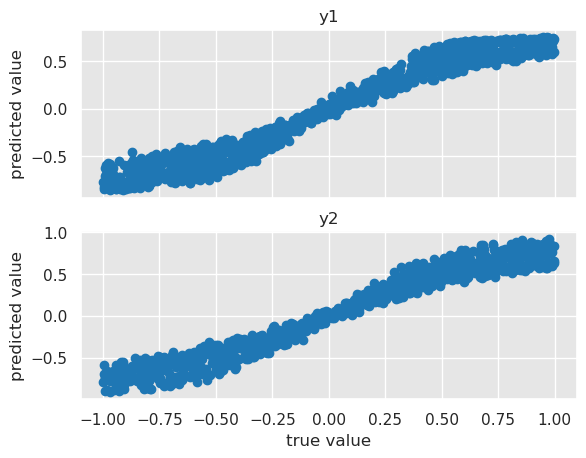

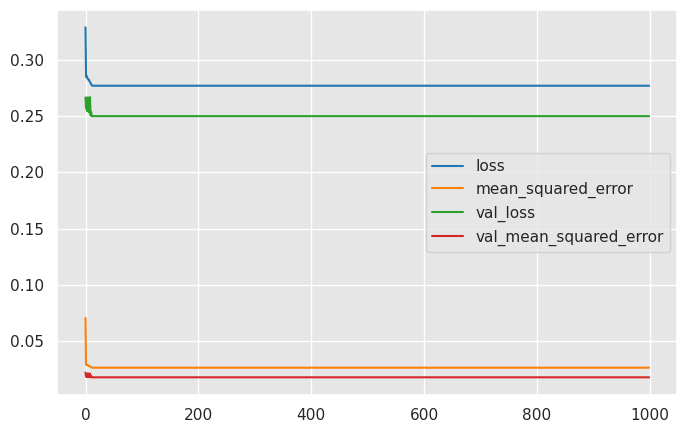

1/1 [==============================] - 0s 21ms/step
[[-0.00270054  0.00464869]
 [-0.37199865  0.37702091]
 [-0.37168148 -0.36967835]
 [ 0.36733565 -0.36901722]
 [ 0.36701721  0.37767747]
 [-0.5261171   0.53172653]
 [ 0.52219993 -0.52502484]
 [-0.57993774  0.58559519]
 [ 0.52219993 -0.52502484]
 [-0.52571772 -0.52585615]]


In [7]:
# Model 2 - NN fitting with Augmented data

model = NNmodel.model()
history = model.fit(X_train_Aug, Y_train_Aug,
                    epochs=epochs, 
                    batch_size= batch_size, 
                    verbose=verbose, 
                    validation_data=(X_validation, Y_validation),
                    # callbacks=callbacks,
                    # shuffle=True
                    )  
model_eval(model, history, X_validation, Y_validation, X_train_Aug, Y_train_Aug, batch_size, X_test)

if data_size==100:
    model.save('./models/NN_100_Aug.h5')
else:
    model.save('./models/NN_1000_Aug.h5')

32/32 [==============================] - 0s 923us/step
rmse of y1:  0.13708557995652243
rmse of y2:  0.13014716362862325
1/1 [==============================] - 0s 18ms/step
[[-0.00270054  0.00464869]
 [-0.37199865  0.37702091]
 [-0.37168148 -0.36967835]
 [ 0.36733565 -0.36901722]
 [ 0.36701721  0.37767747]
 [-0.5261171   0.53172653]
 [ 0.52219993 -0.52502484]
 [-0.57993774  0.58559519]
 [ 0.52219993 -0.52502484]
 [-0.52571772 -0.52585615]]


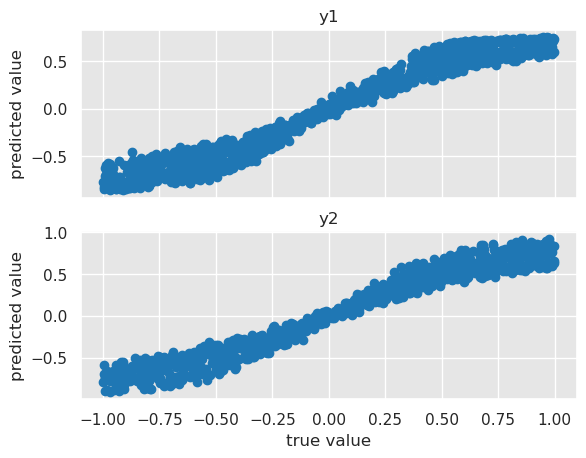

In [8]:
from keras.utils import CustomObjectScope

with CustomObjectScope({'Hidden_layer':Hidden_layer, 'Output_layer':Output_layer}):
       if data_size==100:
              load_model = tf.keras.models.load_model('./models/NN_100_Aug.h5')
       else:
              load_model = tf.keras.models.load_model('./models/NN_1000_Aug.h5')
              
model_eval_low(load_model, X_validation, Y_validation, X_train_Aug, Y_train_Aug, batch_size, X_test)